# **ΝΕΥΡΩΝΙΚΑ ΔΙΚΤΥΑ**
# **ΡΟΥΣΟΣ ΣΤΑΜΑΤΗΣ**


# **Εισαγωγη**

Σε αυτη την εργασια θα ασχοληθω με το cifar-10 Dataset. Αρχικα, ως ενδιαμεσο σταδιο, θα υλοποιησω τους classifiers K-Nearest-Neighbors (KNN) και Nearest Centroid (NCC) ως ενα baseline, και θα συγκρινω την αποδοση τους. Στη συνεχεια, θα προσπαθησω να χτισω ενα CNN διαφορων αρχιτεκτονικων, το οποιο θα εκπαιδευτει με το dataset αυτο, και θα συγκρινω την αποδοση του με τους παραπανω κατηγοριοποιητες. Προφανως αναμενουμε το νευρωνικο δικτυο να τα παει πολυ καλυτερα. Στοχος μας, η καλη εκπαιδευση η οποια θα φανει απο τις μετρικες training-validation loss και η καλη γενικευση. Οσον αφορα τις διαφορες αρχιτεκτονικες που ανεφερα, θα πειραματιστω με τις υπερπαραμετρους του νευρωνικου δικτυου, οπως: learning rate, batch size, πληθος εποχων, πληθος νευρονων ανα επιπεδο, πληθος επιπεδων, optimizer, loss function, διαφορες συναρτησεις ενεργοποιησης κλπ, ωστε να βελτιωσω την αποδοση του νευρωνικου δικτυου μου, αλλα πρωτιστως να μαθω πως η καθεμια το επηρεαζει. Η εργασια εγινε εξ ολοκληρου στο google colab.

# **1. Ενδιαμεση Εργασια**

Ξεκιναμε με την ενδιαμεση εργασια. Παρακατω εισαγω τις βιβλιοθηκες που θα χρειαστω.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from tensorflow.keras.datasets import cifar10

# **Cifar-10 Dataset**

Λιγα λογια για το cifar10 Dataset. Το dataset περιεχει 60.000 εικονες, απο τις οποιες 50.000 χρησιμοποιουνται για την εκπαιδευση του μοντελου (training) και 10.000 για την αξιολογηση της αποδοσης του (testing). Περιεχονται 10 κλασεις, με 6000 εικονες για την καθε μια. Η καθε εικονα αρχικα ειναι τριων διαστασεων 32x32x3 καθως ειναι 32x32 και καθε πιξελ ειναι στην ουσια ενα διανυσμα [R G B]. Μπορουμε να φανταστουμε καθε εικονα σαν τρεις 2D πινακες 32x32, ο ενας πανω απο τον αλλο, οπου ο καθενας αντιστοιχει στις τιμες red/green/blue των πιξελ.

# **Προεπεξεργασια Δεδομενων**
Εχοντας πει τα παραπανω, και με δεδομενο οτι τα δεδομενα εκπαιδευσης ειναι 50.000 εικονες και 50.000 ετικετες, θα εναποθεσουμε τις εικονες του training dataset στη μεταβλητη X_train_orig με σχημα: (50.000,32,32,3) και τις ταμπελες (labels) στην y_train_orig με σχημα: (50.000,1). Ομοιως και για το testing dataset. Επειδη οι αλγοριθμοι ΚΝΝ-ΝCC της scikit learn περιμενουν 2D πινακα εισοδου Χ και 1D διανυσμα ετικετων y, κανουμε τις μετατροπες παρακατω. Επισης, μετατρεπουμε τις τιμες του X_train_orig σε floats ωστε να γινει η κανονικοποιηση και κανονικοποιουμε. Τωρα καθε τιμη του X_train βρισκεται στο [0.0 , 1.0]. Η μεταβλητη y_train περιεχει τις ετικετες των κατηγοριων, οι οποιες ειναι αριθμοι απο 0 μεχρι και 9.

In [ ]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = cifar10.load_data()                     # Φορτωση Δεδομενων: X_train -> (50.000,32,32,3) , y_train -> (50.000,1)
# Μορφη δεδομενων
print("Αρχικο X_train σχημα:", X_train_orig.shape)
print("Αρχικο y_train σχημα:", y_train_orig.shape)
print("Αρχικο X_test σχημα:", X_test_orig.shape)
print("Αρχικο y_test σχημα:", y_test_orig.shape)
X_train = X_train_orig.reshape(len(X_train_orig), -1).astype(np.float32) / 255.0         # Μετατροπη του αρχικου X_train απο 4D πινακα (50.000,32,32,3) σε 2D Πινακα (50.000,3072) για KNN-NCC
X_test  = X_test_orig.reshape(len(X_test_orig),  -1).astype(np.float32) / 255.0
y_train = y_train_orig.ravel().astype(np.int64)   # Μετατροπη του αρχικου y_train απο πινακα (50.000,1) σε διανυσμα (50.000,) με στοιχεια τυπου ακεραιοι 64bits, για KNN-NCC.
y_test  = y_test_orig.ravel().astype(np.int64)
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("Νεο X_train σχημα:", X_train.shape, "Νεο y_train σχημα:", y_train.shape, " Νεο X_test σχημα:", X_test.shape, "Νεο y_test σχημα:", y_test.shape)
print("Classes:", classes)

Αρχικο X_train σχημα: (50000, 32, 32, 3)
Αρχικο y_train σχημα: (50000, 1)
Αρχικο X_test σχημα: (10000, 32, 32, 3)
Αρχικο y_test σχημα: (10000, 1)
Νεο X_train σχημα: (50000, 3072) Νεο y_train σχημα: (50000,)  Νεο X_test σχημα: (10000, 3072) Νεο y_test σχημα: (10000,)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# **Δημιουργια Συναρτησεων**


In [ ]:
# Standardization
def standardize(train, test):
    scaler = StandardScaler()
    Xtr = scaler.fit_transform(train)      # Μεθοδος fit_transform: συντομευση των μεθοδων fit και transform. Πρωτα τρεχει η fit και υπολογιζει μεσο ορο και τυπικη αποκλιση καθε στηλης του  train και  μετα η transform
                                          # κανει standardize αφαιρωντας τη μεση τιμη της καθε στηλης απο καθε στοιχειο εκεινης της στηλης και διαιρωντας το αποτελεσμα με την τυπικη αποκλιση της στηλης.
                                          # Δηλαδη για τη στηλη j: train_ij' = (train_ij - μ_j) / σ_j
    Xte = scaler.transform(test)
    return Xtr, Xte

def eval_and_report(clf, Xtr, ytr, Xte, yte, name):
    t0 = time.time()
    clf.fit(Xtr, ytr)
    fit_time = time.time() - t0
    t1 = time.time()
    y_pred = clf.predict(Xte)
    infer_time = time.time() - t1
    acc = accuracy_score(yte, y_pred)
    print(f"{name}:  acc={acc*100:.2f}% | fit={fit_time:.2f}s | infer={infer_time:.2f}s")
    print(classification_report(yte, y_pred, target_names=classes, digits=3))
    return y_pred, acc

def plot_confmat(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6.5,6))
    im = ax.imshow(cm, interpolation='nearest'); ax.set_title(title)
    ax.set_xlabel("Predicted"); ax.set_ylabel("True")
    ax.set_xticks(range(len(labels))); ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right"); ax.set_yticklabels(labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", fontsize=8)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04); plt.tight_layout(); plt.show()

# **Principal Component Analysis (PCA)**

Οπως ειπαμε, οι διαστασεις των δεδομενων εκπαιδευσης (X_train) μετα το reshape ειναι (50.000,3072). Οι γραμμες αντιστοιχουν στο πληθος των εικονων που περιεχονται στο dataset, ενω η καθε στηλη ειναι ενα χαρακτηριστικο-feature μιας εικονας. Για παραδειγμα, η 1η στηλη ειναι οι τιμες R (red) του 1ου πιξελ καθε εικονας. Η 2η στηλη ειναι οι τιμες G (green) του 1ου πιξελ καθε εικονας. Η 4η στηλη ειναι οι τιμες R του 2ου πιξελ καθε εικονας, κ.ο.κ. Λογω αυτων των μεγαλων διαστασεων, οι αλγοριθμοι KNN-NCC, χωρις την εφαρμογη **PCA**  αργουν. Μετα απο δοκιμη, το παρακατω cell χωρις PCA χρειαστηκε γυρω στα 2 λεπτα για να τρεξει. Επομενως, θα εφαρμοσουμε PCA ωστε να μειωσουμε τη διασταση των δεδομενων.

Αυτο που κανει το PCA ειναι στην ουσια συμπυκνωση διαστασεων. Δημιουργει νεες ανεξαρτητες διαστασεις που κρατανε τη σημαντικη πληροφορια της αρχικης εικονας. Για παραδειγμα, αν η εικονα εχει 500 πιξελ για τον ουρανο, τοτε τα μετατρεπει σε μια διασταση: ουρανος, και της δινει μια τιμη η οποια δειχνει ποσο ουρανο εχει η εικονα. Μαθηματικα: τα πιξελς των εικονων στο training dataset που αλλαζουν μαζι πχ φωτιζουν/σκοτεινιαζουν μαζι και εχουν παρομοιες τιμες εχουν μεγαλη συσχετιση. Ειναι δηλαδη εξαρτημενα. Ο αλγοριθμος PCA συμπυκνωνει τα συσχετισμενα πιξελ σε μια νεα διασταση ως γραμμικο συνδυασμο με συντελεστες-βαρη αναλογα με το ποσο καθε πιξελ επηρεαζει τη νεα διασταση. Το αποτελεσμα του γραμμικου συνδυασμου, δειχνει ποσο αυτη η νεα διασταση - αυτο το μοτιβο - εμπεριεχεται στην εικονα. Το PCA ειναι λοιπον στην ουσια ενας ομαδοποιητης μοτιβων-σχηματων που επαναλαμβανονται, και δειχνει ποσο καθε μοτιβο υπαρχει στην εικονα. Θα δοκιμασω διαφορες τιμες νεων διαστασεων.  

In [ ]:
X_train_std, X_test_std = standardize(X_train, X_test)

# Νεα διασταση για PCA
N_COMPS = 10

# PCA
print("Εκκίνηση PCA...")
pca = PCA(n_components=N_COMPS, svd_solver="randomized", random_state=0)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca  = pca.transform(X_test_std)

print("Αρχικό shape:", X_train_std.shape, "→ Μετά το PCA:", X_train_pca.shape)

print(f"=== PCA({N_COMPS}) ===")

# KNN k=1
y1_pca, acc_k1_pca = eval_and_report(KNeighborsClassifier(n_neighbors=1, n_jobs=-1),X_train_pca, y_train, X_test_pca, y_test,f"KNN (k=1) + PCA({N_COMPS})")

# KNN k=3
y3_pca, acc_k3_pca = eval_and_report(KNeighborsClassifier(n_neighbors=3, n_jobs=-1),X_train_pca, y_train, X_test_pca, y_test,f"KNN (k=3) + PCA({N_COMPS})")

# Nearest Centroid
ync_pca, acc_nc_pca = eval_and_report(NearestCentroid(),X_train_pca, y_train, X_test_pca, y_test,f"Nearest Centroid + PCA({N_COMPS})")



Εκκίνηση PCA...
Αρχικό shape: (50000, 3072) → Μετά το PCA: (50000, 10)
=== PCA(10) ===
KNN (k=1) + PCA(10):  acc=30.89% | fit=0.10s | infer=0.88s
              precision    recall  f1-score   support

    airplane      0.377     0.415     0.395      1000
  automobile      0.344     0.312     0.327      1000
        bird      0.236     0.269     0.252      1000
         cat      0.245     0.219     0.231      1000
        deer      0.255     0.262     0.259      1000
         dog      0.290     0.254     0.271      1000
        frog      0.294     0.340     0.315      1000
       horse      0.304     0.306     0.305      1000
        ship      0.401     0.401     0.401      1000
       truck      0.349     0.311     0.329      1000

    accuracy                          0.309     10000
   macro avg      0.309     0.309     0.308     10000
weighted avg      0.309     0.309     0.308     10000

KNN (k=3) + PCA(10):  acc=30.94% | fit=0.06s | infer=1.18s
              precision    recall  f

# **Confusion Matrixes**
Παρακατω βλεπουμε το confusion matrix του classifier KNN για k=1,3 και του Nearest Centroid. Οι γραμμες του πινακα δειχνουν την πραγματικη κατηγορια των εικονων του testing Dataset, ενω οι στηλες την προβλεψη που εκανε ο αντιστοιχος κατηγοριοποιητης. Για παραδειγμα, στο πρωτο κελι του Confusion Matrix του ΚΝΝ για k=1 παρακατω βλεπουμε τον αριθμο 495. Αυτο σημαινει οτι 495 εικονες που ηταν αεροπλανα, κατηγοριοποιηθηκαν ως αεροπλανα, δηλαδη ο αλγοριθμος εκανε σωστη προβλεψη. Στα επομενα κελια της 1ης γραμμης, βλεπουμε ποσες εικονες που ηταν αεροπλανα κατηγοριοποιηθηκαν λαθος σε αλλες κατηγοριες. Ιδανικα, θα θελαμε τα στοιχεια στη διαγωνιο να εχουν τη μεγιστη τιμη (1000 δηλαδη που ειναι το πληθος των εικονων ανα κατηγορια στο testing dataset) και ολα τα υπολοιπα στοιχεια του πινακα να ειναι μηδενικα. Αυτο θα σημαινε οτι ολες οι εικονες που εξεταστηκαν, κατηγοριοποιηθηκαν σωστα και το μοντελο μας θα ειχε 100% αποδοση.

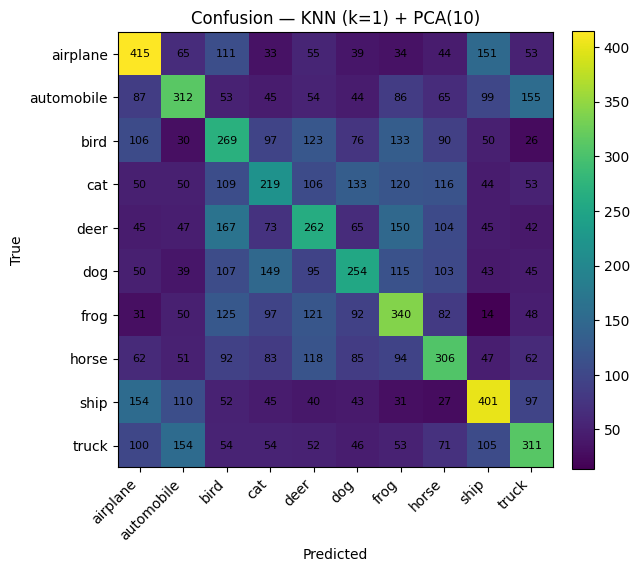

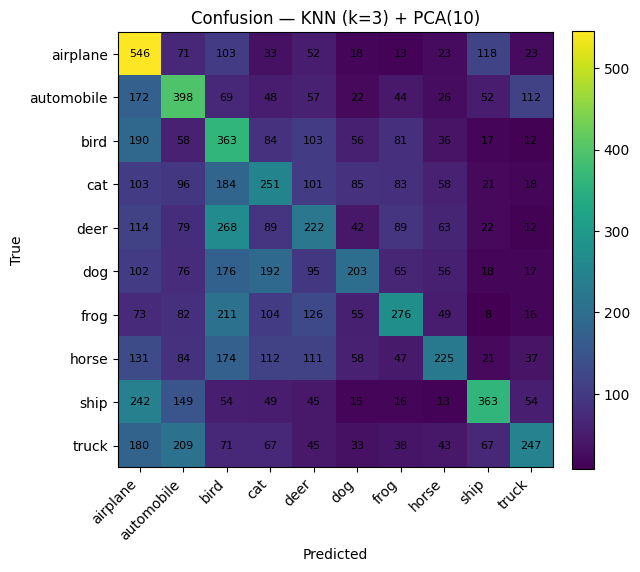

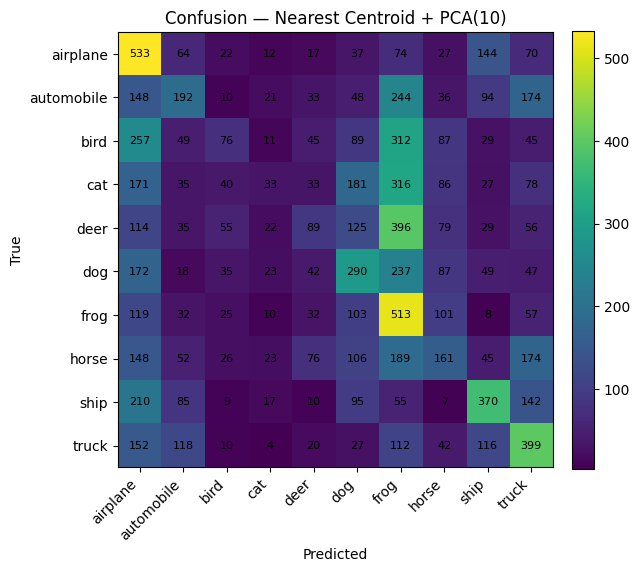

In [ ]:
plot_confmat(y_test, y1_pca, classes, f"Confusion — KNN (k=1) + PCA({N_COMPS})")
plot_confmat(y_test, y3_pca, classes, f"Confusion — KNN (k=3) + PCA({N_COMPS})")
plot_confmat(y_test, ync_pca, classes, f"Confusion — Nearest Centroid + PCA({N_COMPS})")

# **Συμπερασματα**

1. Παρατηρουμε οτι ο KNN διακρινει καλυτερα τις εικονες στις κατηγοριες:
irplane-bird-deer-frog-ship αφου τα στοιχεια στη διαγωνιο εχουν τις μεγαλυτερες τιμες σε αυτες. Ο nearest Centroid εχει καλη αποδοση στις: airplane-frog-ship-truck. Ας εξηγησουμε το γιατι:

* Ο KNN λειτουργει ως εξης: Παιρνει τα χαρακτηριστικα της testing εικονας, δηλαδη τις τιμες των 3072 διαστασεων της που ειναι στην ουσια οι R/G/B τιμες καθε πιξελ - pixel values (στην πραγματικοτητα ο KNN δεν παιρνει pixel values αλλα τις τιμες μετα το PCA, αλλα για να το καταλαβω καλυτερα θα θεωρησω οτι ειναι pixel values), και υπολογιζει την αποσταση τους απο τα αντιστοιχα pixel values των 50.000 εικονων που ελαβε στην "εκπαιδευση". Δηλαδη υπολογιζει την μετρικη:
$$
d(\text{testing image}, \text{training image}) =
\sqrt{ \sum_{i=1}^{N_{\text{PCA}}}
\left( x^{(\text{test})}_{\text{PCA},i} - x^{(\text{train})}_{\text{PCA},i} \right)^2 }
$$
* Η αποσταση αυτη υπολογιζεται για ολες τις training εικονες απο την testing εικονα. Δηλαδη ο KNN κανει 50.000 υπολογισμους αποστασεων ανα testing image. Στη συνεχεια, τις συγκρινει και βρισκει ποιες ειναι οι k μικροτερες, βρισκει δηλαδη τους k κοντινοτερους γειτονες της υπο ταξινομηση εικονας. Κατοπιν, παιρνει τις ετικετες αυτων των γειτονων απο το y_train, βλεπει ποια ετικετα βρισκεται σε πλειοψηφια και αποφασιζει οτι η υπο ταξινομηση εικονα ανηκει στην κατηγορια εκεινης της ετικετας.

* Αυτο γινεται για καθε testing εικονα, δηλαδη ο ΚΝΝ κανει 10.000 x 50.000 = 500.000.000 υπολογισμους αποστασεων γι'αυτο και ο αλγοριθμος αργει. Η εφαρμογη του PCA επιχειρει να κανει τον αλγοριθμο πιο γρηγορα, μειωνοντας τη διασταση των εικονων απο 3072 που ειναι αρχικα, ετσι ωστε οι παραγοντες του αθροισματος της αποστασης να μην ειναι 3072 αλλα πολυ λιγοτεροι.

* Η αφαιρεση:

$$
x^{(\text{test})}_{\text{PCA},i} - x^{(\text{train})}_{\text{PCA},i}
$$
υπολογιζει τη διαφορα καθε χαρακτηριστικου της testing image απο το αντιστοιχο χαρακτηριστικο των training images. Υψωμενη στο τετραγωνο μας δινει ενα θετικο αριθμο. Οσο πιο μικρος αυτος ο αριθμος, τοσο μικροτερη η απολυτη διαφορα, δηλαδη τοσο περισσοτερο "μοιαζουν" τα συγκεκριμενα χαρακτηριστικα. Εφοσον ο ΚΝΝ κραταει τις k μικροτερες αποστασεις, ψαχνει τις k "κοντινοτερες" εικονες, αυτες που μοιαζουν περισσοτερο στην υπο ταξινομηση εικονα.

* Ο λογος λοιπον που ο ΚΝΝ "προβλεπει"- κατηγοριοποιει καλυτερα τις εικονες στις κατηγοριες αυτες, ειναι επειδη οι εικονες σε αυτες τις κατηγοριες μοιαζουν περισσοτερο η μια με την αλλη. Οι pixel values τους, τα χρωματα τους δηλαδη, ή πιο σωστα τα pca χαρακτηριστικα ειναι κοντα το ενα με το αλλο. Για παραδειγμα, οι περισσοτερες εικονες αεροπλανων εχουν γαλαζιο ουρανο. Τα πλοια εχουν μπλε θαλασσα. Οι περισσοτεροι βατραχοι εχουν πρασινο χρωμα. Τα ελαφια καφε. Ετσι, οταν ερχεται μια εικονα αεροπλανου υπο εξεταση, η αποσταση-ομοιοτητα απο τις υπολοιπες εικονες αεροπλανου ειναι μικροτερη απο τις αλλες κατηγοριες λογω κοινων χαρακτηριστικων (πχ γαλαζιος ουρανος). Σε αλλες κλασεις, οπως πχ φορτηγο, οι εικονες διαφερουν περισσοτερο. Τα κοινα χαρακτηριστικα μεταξυ των εικονων της ιδιας κλασης ειναι λιγοτερα, με αποτελεσμα ο αλγοριθμος να "μπερδευεται" και να τις κατηγοριοποιει λαθος γιατι τα χρωματα-χαρακτηριστικα τους μοιαζουν περισσοτερο με αυτα μιας εικονας σε αλλη κατηγορια.

2. Ο Nearest Centroid λειτουργει ως εξης:

*   Εστω οτι η κλαση c περιεχει Nc εικονες εκπαιδευσης. Yπολογιζει το μεσο ορο του χαρακτηριστικου j των εικονων στη κλαση c:
$$
\mu_{c,j} = \frac{1}{N_c} \sum_{i=1}^{N_c} x_{i,c,j}
$$
για καθε χαρακτηριστικο j.
*  Δημιουργει το **κεντροειδες** διανυσμα με συντεταγμενες αυτους τους μεσους ορους:
 $$
\boldsymbol{\mu}_c = [\mu_{c,1}, \mu_{c,2}, \dots, \mu_{c,m}]
$$
για την κλαση c. Αφου εχουμε 10 κλασεις, θα εχουμε 10 κεντροειδη διανυσματα.
* Για καθε test εικονα x_test, υπολογιζει την αποσταση απο καθε κεντροειδες:
$$
d(\mathbf{x}_{\text{test}}, \boldsymbol{\mu}_c) =
\sqrt{ \sum_{j=1}^{m} (x_{\text{test},j} - \mu_{c,j})^2 }
$$
Η εικόνα ταξινομείται στην κατηγορία c που έχει το πλησιέστερο κεντροειδές (δηλαδή τη μικρότερη απόσταση).

Ο Nearest Centroid ειναι πιο γρηγορος απο τον ΚΝΝ γιατι για καθε test εικονα υπολογιζει μονο 10 αποστασεις απο τα 10 κεντροειδη αντι 50.000. Ωστοσο, οπως ειδαμε απο την ακριβεια του, ειναι λιγοτερο ακριβης γιατι συμπυκνωνει τις εικονες καθε κατηγοριας σε ενα μονο κεντρικο σημειο, χανοντας ετσι πληροφορια.

3. Για την "εκπαιδευση"  του μοντελου clf: KNN/NCC (βαζω εισαγωγικα γιατι οι κατηγοριοποιητες KNN-NCC δεν εκπαιδευονται/μαθαινουν πραγματικα, αλλα απλα αποθηκευουν τα δεδομενα εκπαιδευσης) χρησιμοποιηθηκε η συναρτηση fit(X_train,y_train) ενω για την προβλεψη η συναρτηση predict(X_test). Η προβλεψη γινεται με τον τροπο που ανεφερα παραπαρανω (ευρεση k κοντινοτερων γειτονων κλπ). Προσθεσα τους χρονους "εκπαιδευσης" (fit) και προβλεψης (infer). Χρησιμοποιηθηκαν επισης οι συναρτησεις accuracy_score, classification_report, confusion_matrix, για τον υπολογισμο της αποδοσης καθε κατηγοριοποιητη, μετρικες precision/recall/f1-score
ανα κατηγορια, και τους confusion matrix αντιστοιχα απο το module sklearn.metrics της sklearn library. Οι αλγοριθμοι KNN/NCC εισαχθηκαν ετοιμοι απο το module sklearn.neighbors. Παρατηρουμε οτι ο Nearest Centroid ειναι αρκετα πιο γρηγορος απο τον KNN απο τα σχεδον μηδενικα inference time του, ομως υστερει σε ακριβεια. Η μετρικη recall για μια κατηγορια δειχνει ποσοστιαια ποσες απο τις εικονες της κατηγοριας προβλεψε σωστα, ενω η precision ποσες απο τις προβλεψεις που εκανε για αυτη την κατηγορια ηταν σωστες. Για παραδειγμα ας παρουμε την κατηγορια γατες στον KNN (k=1). Η recall δειχνει ποσες απο τις 1000 γατες βρηκε: 219/1000 = 0.219 ενω η precision ποσες απο τις εικονες που προβλεψε ως γατες ηταν οντως γατες. Στην ουσια κοιτωντας τον confusion matrix, η recall για τις γατες ειναι: στοιχειο διαγωνιου/(αθροισμα στοιχειων γραμμης cats -> total cats images) ενω η precision: τιμη στοιχειο/(αθροισμα στοιχειων στηλης cats -> total cats predictions). Η μετρικη f1-score ειναι ενας συνδυασμος των precision-recall.


4. Παιζοντας με τις διαστασεις του PCA με τιμες: 300, 200, 150, 100, 50, 20, 10, 5, παρατηρησα το εξης:

Μεχρι τις 50 διαστασεις (απο τις 3072) και ισως λιγο μετα, η αποδοση του ΚΝΝ αυξανοταν. Ωστοσο στις 20 βλεπουμε ελαφρια μειωση της αποδοσης, και απο τις 10 και κατω βλεπουμε δραστικη μειωση. Αυτο οφειλεται στο οτι με το PCA, κραταμε σημαντικα μοτιβα εικονων που επαναλαμβανονται και πεταμε τα ασυσχετιστα πιξελ και τα σπανια μοτιβα που μπορει να μπερδεψουν τους κατηγοριοποιητες. Μετα απο ενα σημειο ομως, αν μειωσουμε τις διαστασεις παρα πολυ, φτανουμε να πεταμε ορισμενα σημαντικα μοτιβα που υπαρχουν στις εικονες, και ο KNN δεν μπορει πλεον να διακρινει καλα τις κατηγοριες. Για παραδειγμα στην κατηγορια των αεροπλανων, με μεγαλη μειωση των διαστασεων μπορει να χασουμε το μοτιβο του ουρανου. Οποτε η ακριβεια πεφτει. Παρατηρουμε επισης, οτι η ακριβεια του Nearest Centroid, χειροτερευει συνεχως με τη μειωση των διαστασεων. Αυτα βλεπουμε και στον παρακατω πινακα.

In [ ]:

data = {
    "PCA Components": [300, 200, 150, 100, 50, 20, 15, 10, 5],
    "KNN (k=1)": [36.93, 37.56, 38.04, 38.61, 39.01, 37.23, 34.15, 30.89, 21.81],
    "KNN (k=3)": [34.66, 35.38, 35.93, 36.91, 38.28, 37.13, 34.21, 30.94, 22.88],
    "Nearest Centroid": [28.10, 28.08, 28.08, 28.07, 27.95, 27.69, 26.77, 26.56, 24.45]
}

df = pd.DataFrame(data)
df.style.format({
    "KNN (k=1)": "{:.2f}%",
    "KNN (k=3)": "{:.2f}%",
    "Nearest Centroid": "{:.2f}%"
})

,PCA Components,KNN (k=1),KNN (k=3),Nearest Centroid
0,300,36.93%,34.66%,28.10%
1,200,37.56%,35.38%,28.08%
2,150,38.04%,35.93%,28.08%
3,100,38.61%,36.91%,28.07%
4,50,39.01%,38.28%,27.95%
5,20,37.23%,37.13%,27.69%
6,15,34.15%,34.21%,26.77%
7,10,30.89%,30.94%,26.56%
8,5,21.81%,22.88%,24.45%
